# Chapter 4 - Clustering Using Unsupervised Learning

Important ML clustering algorithms:* K-means clustering Algorithm* Mean-shift clustering Algorithm* Hierarchical clustering algorithm

# K-Means Clustering

### K-Means Clustering Example - 1

In [2]:
# Basic Libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import pandas as pd
import numpy as np

### K-Nearest Neighbor (KNN) Classifier

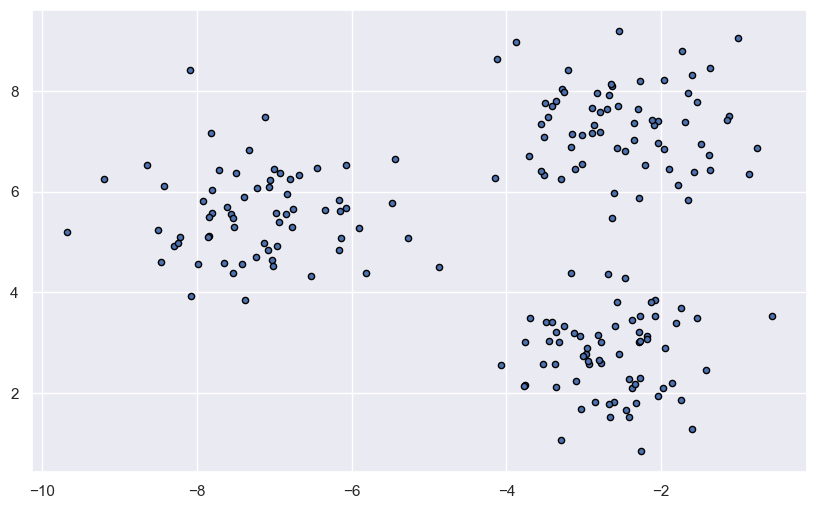

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# Generating 2-dimensional dataset having 3 blobs
X, y_true = make_blobs(n_samples=200,    # Generate 200 samples (data points)
                       centers=3,        # Generate 3 cluster centers (blobs)
                       cluster_std=0.8)  # Set standard deviation of clusters

# Set the figure size before plotting
plt.figure(figsize=(10, 6))    # Set figure size

# Scatter plot of the generated dataset
plt.scatter(X[:, 0],           # Plot the x-coordinates of the points
            X[:, 1],           # Plot the y-coordinates of the points
            s=20,              # Set marker size to 10
            edgecolor='black') # Set edge color of markers to black

plt.show()  # Display the plot

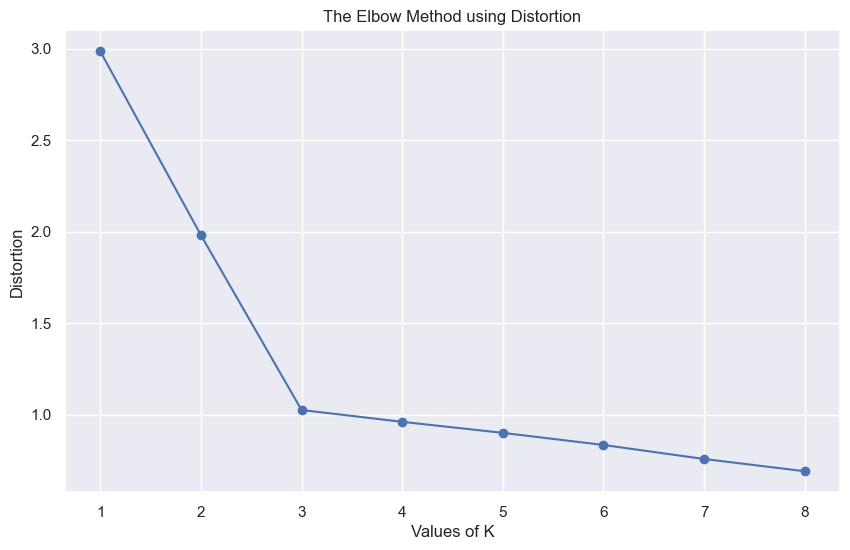

In [5]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


# Initialize lists and dictionaries for storing results
distortions = []    # List to store distortion values
inertias = []       # List to store inertia values
mapping_1 = {}      # Dictionary to store distortion values for each value of K
mapping_2 = {}      # Dictionary to store inertia values for each value of K
K = range(1, 9)     # Range of K values to evaluate (1 to 8)

# Loop through different values of K to build and evaluate KMeans models
for k in K:                                                # Iterate over each value of K in the range (from 1 to 8)

    # Building and fitting the KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42).fit(X)   # Fit the KMeans model with k clusters to the dataset X

    # Calculate and store distortion values
    distortion = sum(np.min(cdist(X,                              # Calculate the minimum distances between points and cluster centers
                                  kmeans_model.cluster_centers_,  # The cluster centers found by the KMeans model
                                  'euclidean'),                   # Use Euclidean distance to compute distances
                            axis=1)) / X.shape[0]                 # Average distortion for all points in the dataset
    distortions.append(distortion)                                # Append the calculated distortion value to the list of distortions

    # Calculate and store inertia values
    inertia = kmeans_model.inertia_       # Get the inertia value, which is the sum of squared distances of samples to their closest cluster center
    inertias.append(inertia)              # Append the inertia value to the list of inertias

    # Store distortion and inertia values in dictionaries
    mapping_1[k] = distortion             # Store the calculated distortion value for the current K in mapping_1 dictionary
    mapping_2[k] = inertia                # Store the calculated inertia value for the current K in mapping_2 dictionary

# Visualizing the result using different values of distortion
plt.figure(figsize=(10, 6))                     # Create a larger figure for better visualization
plt.plot(K, distortions, color='b', marker='o', linestyle='-')  # Plot the values of K against distortions with blue color, 'o' marker, and solid line
plt.xlabel('Values of K')                       # Set x-axis label
plt.ylabel('Distortion')                        # Set y-axis label
plt.title('The Elbow Method using Distortion')  # Set title for the plot
plt.grid(True)                                  # Add grid for better readability
plt.show()                                      # Display the plot

We can find the optimal value of k at the elbow, that is, the point after
which the distortion and inertia start decreasing linearly (check the
preceding outputs). That’s the reason, for our dataset, we can conclude that
the optimal number of clusters is 3.

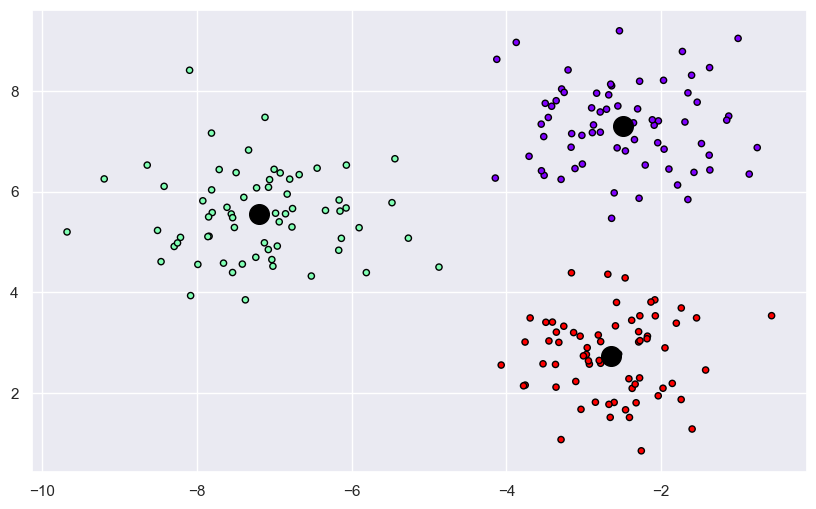

In [7]:
#Creating an object of k-means and providing number of clusters
kmeans = KMeans(n_clusters=3)

#Train the model by using fit method of k-means() class
kmeans.fit(X)

# do the predictions
y_kmeans = kmeans.predict(X)

# Set the figure size before plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the clustered dataset
plt.scatter(X[:, 0],               # Plot the x-coordinates of the data points
            X[:, 1],               # Plot the y-coordinates of the data points
            c=y_kmeans,            # Color the points based on their cluster label
            s=20,                  # Set marker size to 10
            cmap='rainbow',        # Set the colormap to 'rainbow' for different colors per cluster
            edgecolor='black')     # Set edge color of markers to black for better visibility

# Plotting the cluster centers
centers = kmeans.cluster_centers_  # Get the coordinates of the cluster centers

plt.scatter(centers[:, 0],         # Plot the x-coordinates of the cluster centers
            centers[:, 1],         # Plot the y-coordinates of the cluster centers
            c='black',             # Set the color of cluster centers to black
            marker='o',            # Use a different marker ('X') for better visibility of centers
            s=200)                 # Set the marker size larger for cluster centers

plt.show();   # Display the plot

### K-Means Clustering Example - 2

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

#Loading sklearn digit dataset. We will also make its object. 
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
# Creating an object of KMeans clustering algorithm
kmeans = KMeans(n_clusters=10,    # Create a KMeans instance with 10 clusters (assuming 10 different groups)
                random_state=0)   # Set random_state to 0 to ensure reproducibility of the clustering results

# Train the model by using the fit_predict() method on the dataset
clusters = kmeans.fit_predict(digits.data) # Fit the KMeans model to the data and predict the cluster labels for each sample

# Get the shape of the cluster centers
kmeans.cluster_centers_.shape              # Get the dimensions of the array representing the cluster centers

(10, 64)

The code bellow takes the cluster centers found by the KMeans clustering algorithm and reshapes them into 8x8 pixel images. Each image represents the average digit that characterizes each cluster. The images are plotted using Matplotlib, with 2 rows and 5 columns of subplots to represent all 10 clusters.

This visualization allows you to see what each cluster center looks like, which can give insights into the typical patterns recognized by the clustering algorithm. In the case of the digits dataset, each cluster center resembles one of the digits (0 to 9).

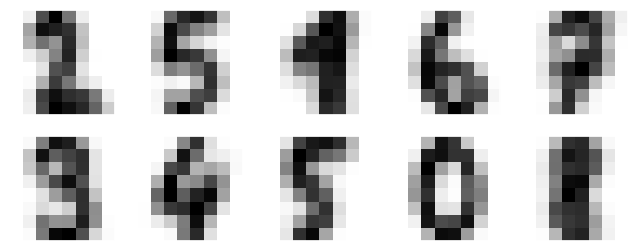

In [12]:
# Picking up cluster centers learned by the K-means clustering algorithm and plotting them as images
fig, ax = plt.subplots(2, 5, figsize=(8, 3))        # Create a figure with 2 rows and 5 columns of subplots (total 10) with size 8x3 inches

centers = kmeans.cluster_centers_.reshape(10, 8, 8) # Reshape the cluster centers to 10 images of 8x8 pixels (since each center has 64 features)

# Iterate over each subplot and corresponding cluster center
for axi, center in zip(ax.flat, centers):  # Flatten the axes array to easily iterate and map to each center
    axi.set(xticks=[], yticks=[])          # Remove x and y axis ticks for cleaner visualization
    axi.imshow(center,                     # Display the cluster center as an image
               interpolation='nearest',    # Use 'nearest' interpolation to display pixel values without smoothing
               cmap=plt.cm.binary)         # Use a binary color map (black and white) to show the images clearly

In [13]:
from scipy.stats import mode

#Matching the learned cluster lables with true lables found in them.  

labels = np.zeros_like(clusters)                   # Initialize an array of zeros with the same shape as 'clusters' to store the final labels

# Assign each cluster the most common true label using the mode
for i in range(10):                                # Iterate over each cluster label (assuming 10 clusters)
    mask = (clusters == i)                         # Create a boolean mask for samples belonging to cluster 'i'
    labels[mask] = mode(digits.target[mask])[0]    # Assign the most common true label (mode) within the cluster to all points in that cluster

In [14]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the clustering by comparing the true labels to the assigned cluster labels
accuracy_score(digits.target, labels)  

0.7440178074568725

### Advantages of K-means Clustering algorithm
Some of the advantages of K-means clustering are given as follows:
* Easy to understand and implement.
* In the case of having a large number of variables, the K-means
clustering algorithm is much faster than the Hierarchical clustering
algorithm.
* In comparison with the Hierarchical clustering algorithm, we get
tighter clusters with the K-means clustering algorithm.
### Disadvantages of K-means Clustering algorithm
Some of the disadvantages of K-means clustering are given as follows:
* Difficult to predict the value of k.
* Initial input (like the number of clusters) and order of data can impact
the final output.
* Sensitive to rescaling, that is, the output will be impacted strongly if
we rescale our data by any means like normalization or
standardization.

# Mean-Shift Clustering

The mean-shift algorithm, used in unsupervised learning, is one of the most
dominant ML clustering algorithms. It is also called a non-parametric
algorithm because it does not make any kind of assumptions. As the name
implies, this algorithm iteratively assigns the data points to the clusters by
shifting points toward the cluster centroid (contains the highest density of
data points).

One of the advantages of the mean-shift algorithm over other ML clustering
algorithms, like k-means, is that it does not require the user to specify the
number of clusters in advance.

Let us understand the working of the mean-shift clustering algorithm with
the help of the following steps:

1. The first step is the centroid initialization in which all the data points
are initialized to cluster centroids. In this way, we can start with as
many clusters as data points. The aim of the mean-shift algorithm is to
achieve the optimal number of clusters.

2. In this step, the algorithm will update the location of the new centroid.

3. Once updated, the algorithm will now iteratively repeat this process. It
will then move to the highest density of data points, that is, cluster
centroid.

4. Finally, it will stop once the centroids reach a position from where
they cannot move further.

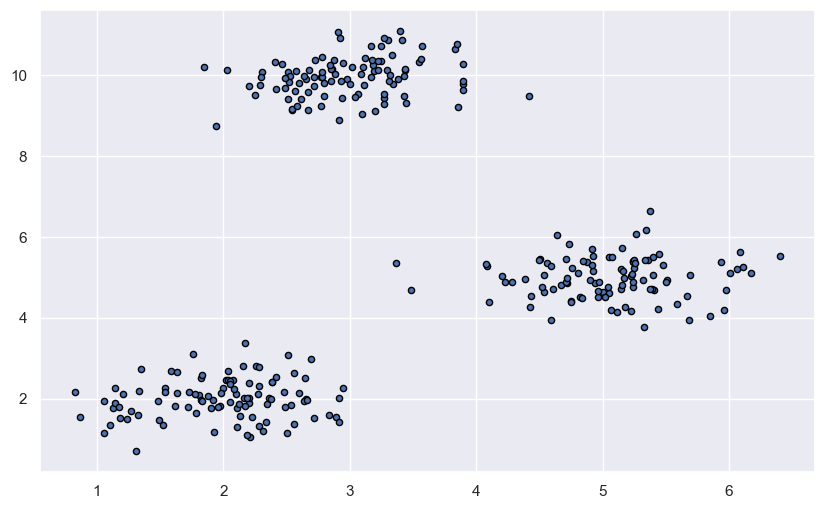

In [16]:
from sklearn.datasets import make_blobs 
from mpl_toolkits.mplot3d import Axes3D

#Generating sample dataset

centers = [[2, 2, 2], [5, 5, 5], [3, 10, 10]]  # Define the coordinates of the centers for 3 clusters in a 3-dimensional space

# Generate 300 samples with 3 clusters centered at the specified locations
X, _ = make_blobs(n_samples=300,     # Number of samples (data points) to generate
                  centers=centers,   # Centers of the clusters defined earlier
                  cluster_std=0.5)   # Standard deviation of the clusters, controls spread around the centers

# Set the figure size before plotting
plt.figure(figsize=(10, 6))

# Scatter plot of the generated dataset (only the first two dimensions are plotted)
plt.scatter(X[:, 0],                 # Plot the x-coordinates (first feature)
            X[:, 1],                 # Plot the y-coordinates (second feature)
            s=20,                    # Set marker size to 10
            edgecolor='black')       # Set edge color of markers to black for better visibility

plt.show()   # Display the scatter plot

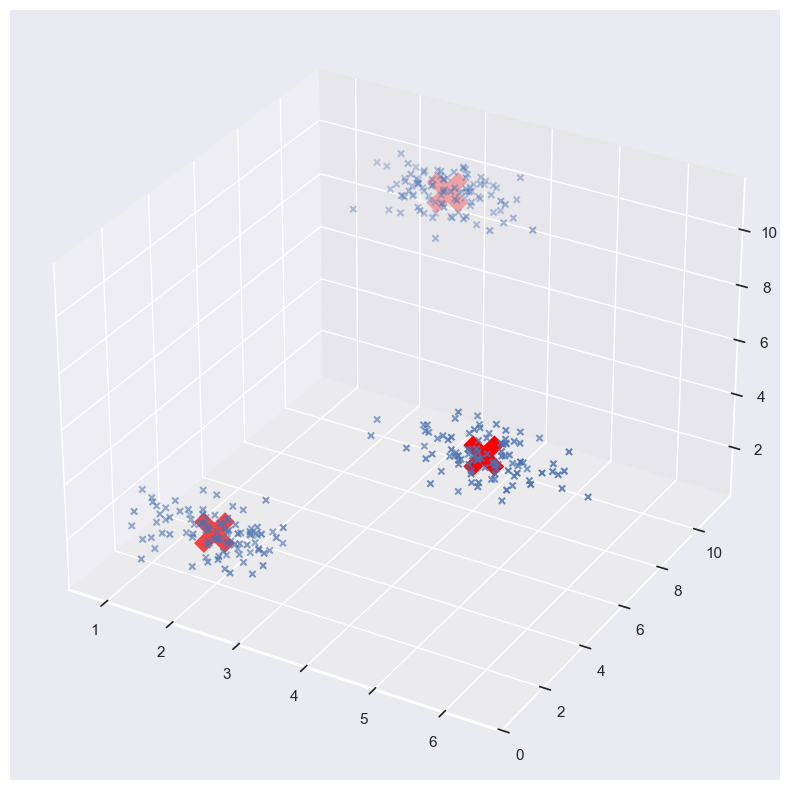

In [17]:
from sklearn.cluster import MeanShift

# Train the model using MeanShift algorithm
ms = MeanShift()   # Create an instance of the MeanShift clustering algorithm
ms.fit(X)          # Fit the MeanShift model to the dataset 'X'

# Storing the coordinates for the cluster centers
cluster_centers = ms.cluster_centers_      # Extract the coordinates of the cluster centers found by MeanShift

# Plotting the data points and centroids using Axes3D to create a 3D graph
fig = plt.figure(figsize=(12, 10))         # Create a new figure for plotting
ms_ax = fig.add_subplot(111,               # Add a 3D subplot to the figure
                        projection='3d')   # Set the projection to '3d' for 3D plotting

# Plot the data points in 3D space
ms_ax.scatter(X[:, 0],      # Plot the x-coordinates (first feature)
              X[:, 1],      # Plot the y-coordinates (second feature)
              X[:, 2],      # Plot the z-coordinates (third feature)
              marker='x')   # Use 'x' markers for data points

# Plot the cluster centers in 3D space
ms_ax.scatter(cluster_centers[:, 0],  # Plot the x-coordinates of the cluster centers
              cluster_centers[:, 1],  # Plot the y-coordinates of the cluster centers
              cluster_centers[:, 2],  # Plot the z-coordinates of the cluster centers
              marker='x',             # Use 'x' markers for cluster centers
              color='red',            # Set the color of the cluster centers to red
              s=500,                  # Set the size of the markers for the cluster centers to 500
              linewidth=10,           # Set the linewidth of the markers to 10 for better visibility
              zorder=10)              # Set z-order to 10 so that cluster centers are plotted above the data points

plt.show();   # Display the 3D plot

#### Advantages of mean-shift clustering algorithm
Some of the advantages of mean-shift clustering are given as follows:
* We do not make any model assumptions as we do while implementing
K-means or Gaussian mixture.
* Mean-shift clustering can model the complex clusters having a nonconvex shape.
* It can automatically determine the number of clusters with the help of
only one parameter named bandwidth.
* Mean-shift clustering does not have the problem of local minima.
#### Disadvantages of mean-shift clustering algorithm
Some of the disadvantages of mean-shift clustering are given as follows:
* It is not useful in the case of high dimensions, that is, when the
number of clusters changes abruptly.
* In some specific applications, we need a specific number of clusters.
* The mean-shift algorithm does not differentiate between meaningful
and meaningless modes.

# Hierarchical Clustering

### Hierarchical Clustering - Understanding the role of dendograms

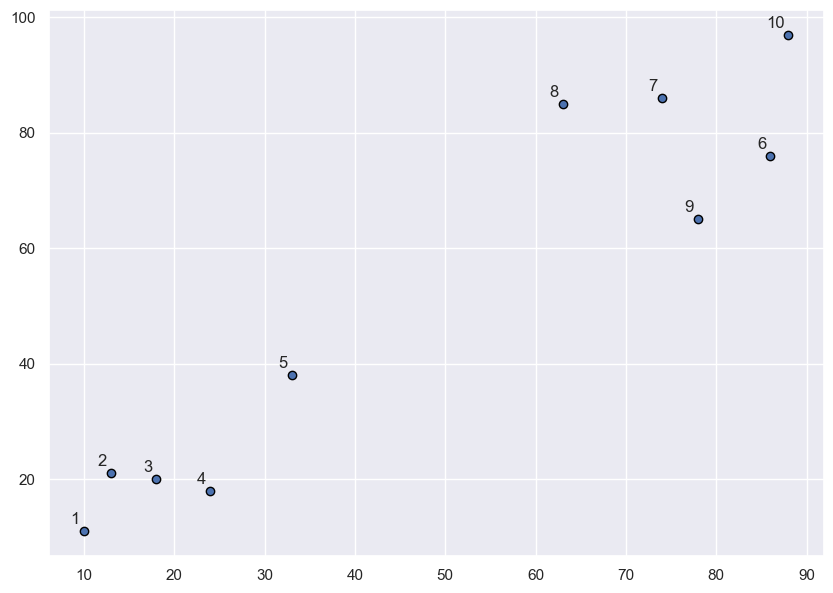

In [19]:
# Create an array of 2D points
X = np.array([[10, 11], [13, 21], [18, 20], [24, 18], [33, 38], [86, 76], [74, 86], [63, 85], [78, 65], [88, 97]])

# Create labels for the points
labels = range(1, 11)                             # Create a range of labels from 1 to 10, each representing a point in 'X'

# Set up the figure for plotting
plt.figure(figsize=(10, 7))                       # Create a figure with dimensions 10x7 inches

# Adjust the space at the bottom of the plot
plt.subplots_adjust(bottom=0.1)                   # Adjust the bottom margin of the subplot for better visibility

# Plot the points on the scatter plot
plt.scatter(X[:, 0],                              # Plot the x-coordinates (first feature)
            X[:, 1],                              # Plot the y-coordinates (second feature)
            label='True Position',                # Set the label for the plotted points
            edgecolor='black')                    # Set the edge color of the points to black for better visibility

# Annotate each point with its label
for label, x, y in zip(labels, X[:, 0], X[:, 1]): # Iterate over labels, x-coordinates, and y-coordinates
    plt.annotate(label,                           # Annotate each point with its corresponding label
                 xy=(x, y),                       # Set the position of the annotation at (x, y)
                 xytext=(-3, 3),                  # Offset the text by (-3, 3) points relative to the point
                 textcoords='offset points',      # Use 'offset points' to specify the position of the text relative to the point
                 ha='right',                      # Align the text horizontally to the right of the point
                 va='bottom')                     # Align the text vertically to the bottom of the point

# Display the plot
plt.show()   # Render and display the scatter plot with annotations

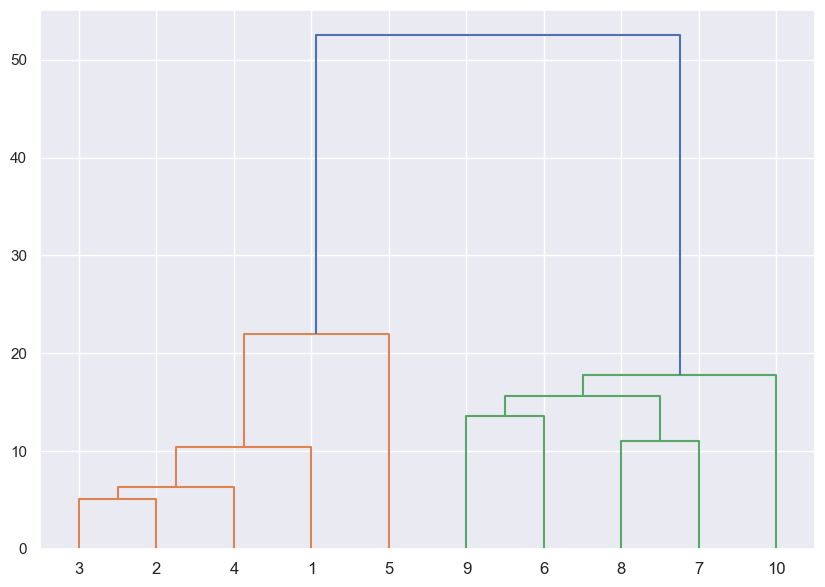

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage  

# Plotting the dendograms of our datapoints

# Generate the linkage matrix for hierarchical clustering
linked = linkage(X, 'single')             # Perform hierarchical clustering using the 'single' linkage method on dataset X

# Create labels for each data point
labelList = range(1, 11)                  # Create a range of labels from 1 to 10, each representing a point in 'X'

# Set up the figure for plotting
plt.figure(figsize=(10, 7))               # Create a figure with dimensions 10x7 inches

# Create the dendrogram
dendrogram(linked,                        # Use the linkage matrix for hierarchical clustering
           orientation='top',             # Set the orientation of the dendrogram to 'top' (root at the top)
           labels=labelList,              # Set labels for each leaf in the dendrogram
           distance_sort='descending',    # Sort distances in descending order for better visualization
           show_leaf_counts=True)         # Show the number of samples under each node

# Display the dendrogram
plt.show()    # Render and display the dendrogram

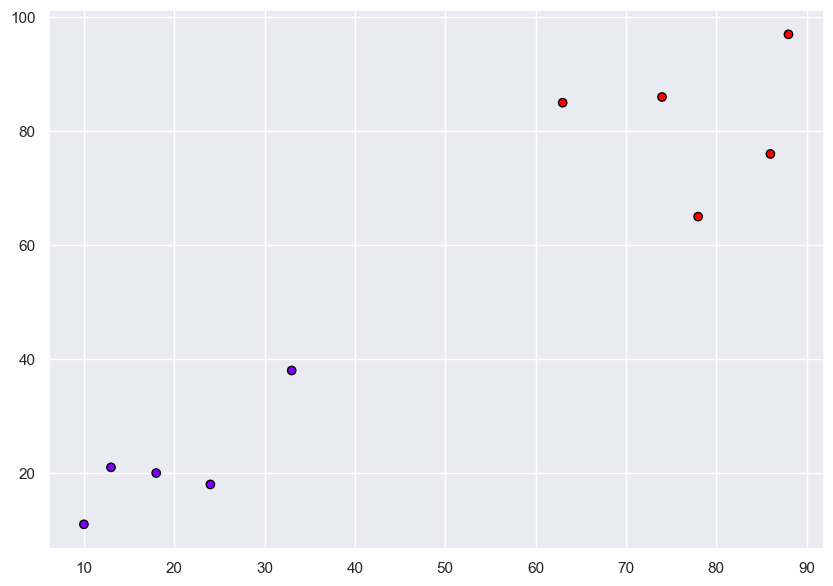

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Predicting the clusters using AgglomerativeClustering from sklearn.cluster
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')  # Create an instance of AgglomerativeClustering with 2 clusters and Ward's linkage
cluster.fit_predict(X)                                           # Fit the model to the dataset 'X' and predict the cluster labels

# Set up the figure for plotting
plt.figure(figsize=(10, 7))    

# Plotting the clusters
plt.scatter(X[:, 0],           # Plot the x-coordinates of the points
            X[:, 1],           # Plot the y-coordinates of the points
            c=cluster.labels_, # Color the points based on their cluster label
            cmap='rainbow',    # Use the 'rainbow' colormap for different clusters
            edgecolor='black') # Set edge color of points to black for better visibility
plt.show()                     # Display the plot

### Hierarchical Cluetring - Implementing using Pima-Indian Dataset

In [23]:
#Download the Pima-Indiands-Diabetes dataset and read it using Pandas as follows:

Data_column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

url = ("https://raw.githubusercontent.com/RohitBhalerao/Neural-Network-Diabetes-Prediction/refs/heads/master/pima-indians-diabetes.csv")

data = pd.read_csv(url, header=None, names= Data_column_names)

data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.shape

(768, 9)

In [25]:
feature_columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

# Features
X = data[feature_columns] 

# Target variable
y = data.label 

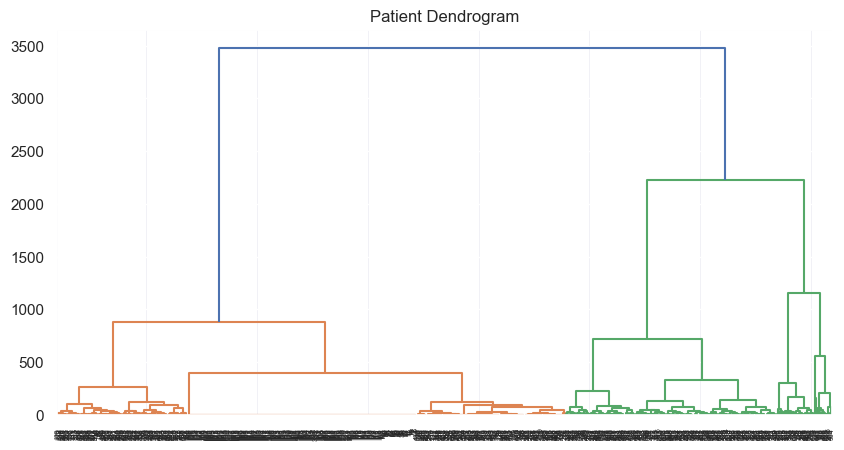

In [26]:
import scipy.cluster.hierarchy as shc

# Extracting specific columns (3rd and 4th, as Python indexing starts at 0)
diabetes_patient_data = data.iloc[:, 3:5].values  # Select columns 3 and 4 (4th and 5th columns, 'skin' and 'insulin') from the DataFrame

# Plotting the dendrogram for the patient data
plt.figure(figsize=(10, 5))       # Create a figure with a size of 10x7 inches
plt.title("Patient Dendrogram")   # Set the title of the dendrogram plot

# Generate and plot the dendrogram
dend_patient = shc.dendrogram(shc.linkage(diabetes_patient_data, method='ward')) # Perform hierarchical clustering using Ward's linkage on selected data
plt.show()   # Display the dendrogram

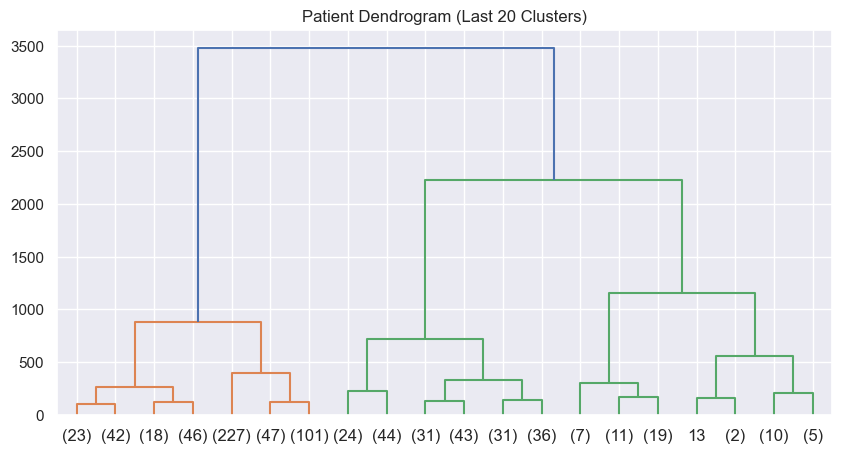

In [27]:
# Extracting specific columns (3rd and 4th, as Python indexing starts at 0)
diabetes_patient_data = data.iloc[:, 3:5].values     # Select columns 3 and 4 (4th and 5th columns, 'skin' and 'insulin') from the DataFrame

# Plotting the dendrogram for the patient data
plt.figure(figsize=(10, 5))                          # Create a figure with a size of 10x5 inches
plt.title("Patient Dendrogram (Last 20 Clusters)")   # Set the title of the dendrogram plot

# Generate and plot the dendrogram for the last 20 clusters
dend_patient = shc.dendrogram(
    shc.linkage(diabetes_patient_data, method='ward'),  # Perform hierarchical clustering using Ward's linkage on selected data
    truncate_mode='lastp',                              # Display only the last 'p' merged clusters
    p=20,                                               # Display the last 20 clusters
    show_leaf_counts=True                               # Display the number of data points in each cluster
)

plt.show();  # Display the dendrogram

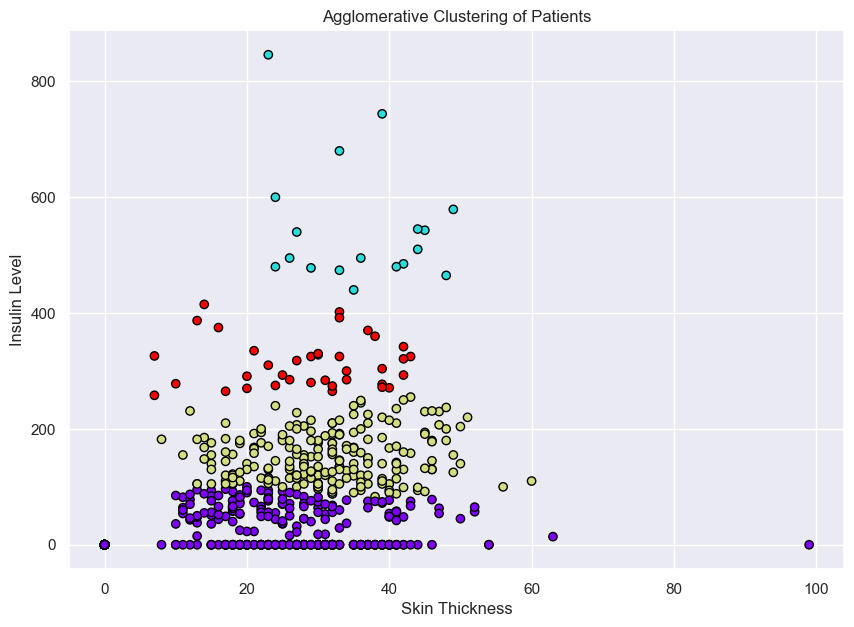

In [28]:
from sklearn.cluster import AgglomerativeClustering

# Predicting the clusters using AgglomerativeClustering from sklearn.cluster
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Remove 'affinity' as Ward linkage uses Euclidean distance by default

# Fit the model to the diabetes_patient_data and predict the clusters
cluster.fit_predict(diabetes_patient_data)

# Plotting the clusters
plt.figure(figsize=(10, 7))                        # Create a larger figure for better visualization
plt.scatter(diabetes_patient_data[:, 0],           # Plot the x-coordinates (first feature, 'skin')
            diabetes_patient_data[:, 1],           # Plot the y-coordinates (second feature, 'insulin')
            c=cluster.labels_,                     # Color the points based on their cluster label
            cmap='rainbow',                        # Use the 'rainbow' colormap for differentiating clusters
            edgecolor='black')                     # Set edge color to black for better visibility
plt.title("Agglomerative Clustering of Patients")  # Set the title of the plot
plt.xlabel('Skin Thickness')                       # Label the x-axis
plt.ylabel('Insulin Level')                        # Label the y-axis
plt.show()                                         # Display the plot

#### Advantages of hierarchical clustering algorithm
Some of the advantages of hierarchical clustering are given as follows:
* It is easy to understand and implement.
* No need to pre-specify the number of clusters. We can easily obtain
the number of clusters by cutting the dendrogram at a proper level.
#### Disadvantages of hierarchical clustering algorithm
Some of the disadvantages of hierarchical clustering are given as follows:
* It does not work well on a large amount of data, missing data, and
with mixed data types.
* In comparison with other efficient algorithms, such as k-means, the
computation time for clustering is long.